In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

In [6]:
df = pd.read_csv('./data/nyc_energy_consumption.csv')
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [8]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
ny_df = df.set_index('timeStamp')

In [11]:
ny_df

demand  precip   temp
timeStamp                                 
2012-01-01 00:00:00  4937.5  0.0000  46.13
2012-01-01 01:00:00  4752.1  0.0000  45.89
2012-01-01 02:00:00  4542.6  0.0000  45.04
2012-01-01 03:00:00  4357.7  0.0000  45.03
2012-01-01 04:00:00  4275.5  0.0000  42.61
...                     ...     ...    ...
2017-08-12 02:00:00     NaN  0.0000  70.84
2017-08-12 03:00:00     NaN  0.0000  70.57
2017-08-12 04:00:00     NaN  0.0000  69.89
2017-08-12 05:00:00     NaN  0.0000  68.59
2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 3 columns]

In [12]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'timeStamp=%{x}<br>demand=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([datetime.datetime(2012, 1, 1, 0, 0),
                          datetime.datetime(2012, 1, 1, 1, 0),
                          datetime.datetime(2012, 1, 1, 2, 0), ...,
                          datetime.datetime(2017, 8, 12, 4, 0),
                          datetime.datetime(2017, 8, 12, 5, 0),
                          datetime.datetime(2017, 8, 12, 6, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([4937.5, 4752.1, 4542.6, ...,    nan,    nan,    nan]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'NYC Energy Demand'},
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'rangeselector': {'buttons': [{'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'count': 2, 'label': '3y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'count': 3, 'label': '5y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'timeStamp'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'demand'}}}
})

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

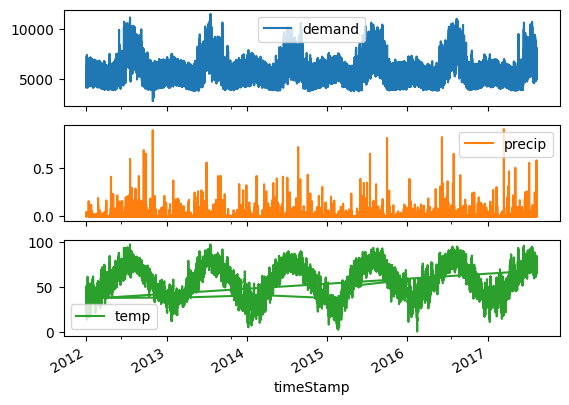

In [13]:
ny_df.plot(subplots=True)

In [14]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [16]:
df.query('demand != demand')

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]